# Team members: Ahmed, Byoungsoo

Remember that each team member must upload the notebook.

# Homework 4

In [34]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import scipy.stats as stat
from matplotlib.patches import Rectangle

## Exercise 1: Minimum Discrimination Error (MDE)

Given two stimuli $s_1$ and $s_2$ with probabilities $\lambda$ and $1-\lambda$, the response function is given as

$$p(r|s) = \begin{cases}
\tfrac12 &for & s=0 &and &r\in[-1,1]\\
\tfrac1{2x} &for &s=1 &and &r\in[-x, x]\\
0 &else
\end{cases}$$

**(a)** Draw diagrams for each possible case and highlight the MDE. Additionally, write down the decision for the Maximal a posteriori estimator $\hat{s}_{MAP}(r)$. *(2 points)*\
*Hint: Differentiate the cases by $\lambda$ and $x$. (there are 4 possibilities)*

**(b)** Compute the MDE for each case analytically. *(1 point)*

**(c)** Confirm your results by simulation for multiple sets of parameters $\lambda$ and $x$.
Choose your selection of parameters such that they cover all cases from (a). *(2 points)*
1. Generate stimuli (sufficient amount)
2. Generate responses
3. Apply estimator (write a function of $\hat{s}_{MAP}(r)$ from (a))
4. Compute MDE
5. Compare to analytical MDE

**(a) Answer**
As the response function is the same for two stimuli, wlog define $s1=0$ and $s2=0$. The other way around will be the same as this analysis.
First, we can differentiate the cases by the value of $x$.
\begin{split}
x &> 1 \textnormal{ or } x &< 1
\end{split}
$$\lambda\cdot p(r|s_1) = \begin{cases}
\frac{\lambda}{2} &\textnormal{ for } r\in[-1,1]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
$$(1-\lambda)\cdot p(r|s_2) = \begin{cases}
\frac{1-\lambda}{2x} &\textnormal{ for } r\in[-x,x]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
Second, we can differentiate the case by the value of $\lambda$ but this is related to the value of $x$.
\begin{split}
\frac{\lambda}{2} &= \frac{1-\lambda}{2x} \\
\lambda &= \frac{1}{1+x}
\end{split}
Combining conditions above, now we have these four cases.
\begin{split}
1) \:x &> 1 \textnormal{ and } \lambda &> \frac{1}{1+x} \\
2) \:x &> 1 \textnormal{ and } \lambda &< \frac{1}{1+x} \\
3) \:x &< 1 \textnormal{ and } \lambda &> \frac{1}{1+x} \\
4) \:x &< 1 \textnormal{ and } \lambda &< \frac{1}{1+x} \\
\end{split}
Now let's plot each case.

In [78]:
def draw_diagram(x=">",lam=">"):
    '''
    x and lam can be ">" or "<" based on the condition you want to draw
    '''
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    ax.set_title("x {} 1 and $\lambda$ {} 1/1+x".format(x, lam))
    # assign x and lambda value according to the condition
    if x == ">":
        x = 2
    else:
        x = 0.5
    if lam == ">":
        lam = 1/(1+x) + 0.2
    else:
        lam = 1/(1+x) - 0.2
    assert lam <= 1
    # to plot
    r_min = -3
    r_max = 3
    f_s1 = lam/2
    f_s2 = (1-lam)/(2*x)
    # f(s1)
    ax.hlines(f_s1,-1,1,color="b",label="f(s1)")
    ax.hlines(0,r_min,-1,color="b")
    ax.hlines(0,1,r_max,color="b")
    ax.vlines(-1,0,f_s1,linestyle="dotted",color="b")
    ax.vlines(1,0,f_s1,linestyle="dotted",color="b")
    # f(s2)
    ax.hlines(f_s2,-x,x,color="c",label="f(s2)")
    ax.hlines(0,r_min,-x,color="c")
    ax.hlines(0,x,r_max,color="c")
    ax.vlines(-x,0,f_s2,linestyle="dotted",color="c")
    ax.vlines(x,0,f_s2,linestyle="dotted",color="c")
    # MDE
    MDE = Rectangle((max(-1,-x),0),2*min(1,x),min(f_s1,f_s2),linewidth=1, edgecolor='r', facecolor='none', hatch="//",label="MDE")
    ax.add_patch(MDE)
    ax.set_xlim(r_min,r_max)
    ax.set_ylim(-0.01,max(f_s1,f_s2)+0.3)
    ax.set_xlabel("r")
    ax.set_ylabel("p(r|s)")
    ax.legend()

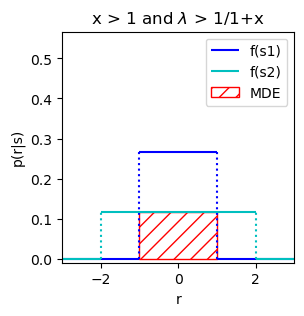

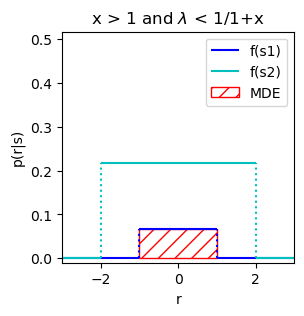

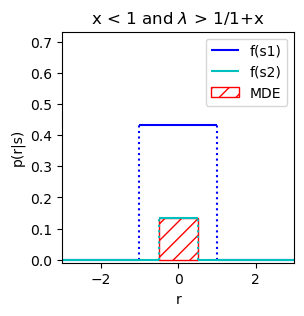

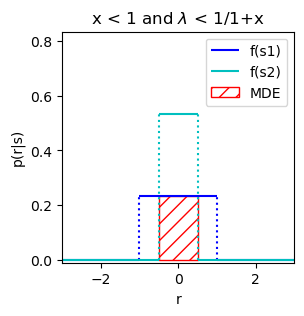

In [79]:
draw_diagram(x=">",lam=">")
draw_diagram(x=">",lam="<")
draw_diagram(x="<",lam=">")
draw_diagram(x="<",lam="<")

Now, let's get the equation for MAP estimator.

$$\hat{s}_{MAP} = \begin{cases} s1 \textnormal{ if } p(s1|r) > p(s2|r) \\ s2 \textnormal{ otherwise} \end{cases}$$

$$\textnormal{with Bayes theorem,}$$
\begin{split}
p(s_i|r) &= \frac{p(r|s_i)\cdot p(s_i)}{p(r)}, \:i = 1 \:or \:2\\
p(s1|r) > p(s2|r) &\Leftrightarrow p(r|s1)\cdot p(s1) > p(r|s2)\cdot p(s2) \\
&\Leftrightarrow \lambda \cdot p(r|s1) > (1-\lambda) \cdot p(r|s2)
\end{split}
$$\textnormal{thus,}$$
$$\hat{s}_{MAP} = \begin{cases} s1 \textnormal{ if } \lambda \cdot p(r|s1) > (1-\lambda) \cdot p(r|s2) \\ s2 \textnormal{ otherwise} \end{cases}$$
$$\textnormal{where}$$
$$p(r|s_1) = \begin{cases}
\frac{1}{2} &\textnormal{ for } r\in[-1,1]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
$$p(r|s_2) = \begin{cases}
\frac{1}{2x} &\textnormal{ for } r\in[-x,x]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
$$\textnormal{therefore, the decision can be made at this boundary}$$
\begin{split}
\lambda &= \frac{1}{1+x}\\
a)\: \lambda > \frac{1}{1+x}:\: \hat{s}_{MAP}(|r| < 1)&=s1,\: \hat{s}_{MAP}(|r| > 1)=s2\\
b)\: \lambda < \frac{1}{1+x}:\: \hat{s}_{MAP}(|r| < x)&=s2,\: \hat{s}_{MAP}(|r| > 1)=s1\\
\end{split}


**(b) Answer**
$$f(s_1) := \lambda\cdot p(r|s_1) = \begin{cases}
\frac{\lambda}{2} &\textnormal{ for } r\in[-1,1]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
$$f(s_2) := (1-\lambda)\cdot p(r|s_2) = \begin{cases}
\frac{1-\lambda}{2x} &\textnormal{ for } r\in[-x,x]\\
0 &\textnormal{ otherwise} 
\end{cases}$$
The same labeling as the four cases above,
\begin{split}
1) \: \int_{-1}^{1} f(s_2) dr &= \int_{-1}^{1} \frac{1-\lambda}{2x} dr = \frac{1-\lambda}{x}\\
2) \: \int_{-1}^{1} f(s_1) dr &= \int_{-1}^{1} \frac{\lambda}{2} dr = \lambda\\
3) \: \int_{-x}^{x} f(s_2) dr &= \int_{-x}^{x} \frac{1-\lambda}{2x} dr = 1-\lambda\\
4) \: \int_{-x}^{x} f(s_1) dr &= \int_{-x}^{x} \frac{\lambda}{2} dr = \lambda x\\
\end{split}

p=0.10 x=0.30 (stim==1)=0.10 MDE_sim=0.030 MDE_anal=0.030
p=0.10 x=0.87 (stim==1)=0.10 MDE_sim=0.087 MDE_anal=0.087
p=0.10 x=1.43 (stim==1)=0.10 MDE_sim=0.101 MDE_anal=0.100
p=0.10 x=2.00 (stim==1)=0.10 MDE_sim=0.100 MDE_anal=0.100
p=0.37 x=0.30 (stim==1)=0.37 MDE_sim=0.109 MDE_anal=0.111
p=0.37 x=0.87 (stim==1)=0.37 MDE_sim=0.322 MDE_anal=0.322
p=0.37 x=1.43 (stim==1)=0.37 MDE_sim=0.369 MDE_anal=0.370
p=0.37 x=2.00 (stim==1)=0.37 MDE_sim=0.315 MDE_anal=0.315
p=0.63 x=0.30 (stim==1)=0.63 MDE_sim=0.189 MDE_anal=0.189
p=0.63 x=0.87 (stim==1)=0.63 MDE_sim=0.369 MDE_anal=0.370
p=0.63 x=1.43 (stim==1)=0.63 MDE_sim=0.259 MDE_anal=0.259
p=0.63 x=2.00 (stim==1)=0.63 MDE_sim=0.185 MDE_anal=0.185
p=0.90 x=0.30 (stim==1)=0.90 MDE_sim=0.101 MDE_anal=0.100
p=0.90 x=0.87 (stim==1)=0.90 MDE_sim=0.100 MDE_anal=0.100
p=0.90 x=1.43 (stim==1)=0.90 MDE_sim=0.069 MDE_anal=0.070
p=0.90 x=2.00 (stim==1)=0.90 MDE_sim=0.049 MDE_anal=0.050


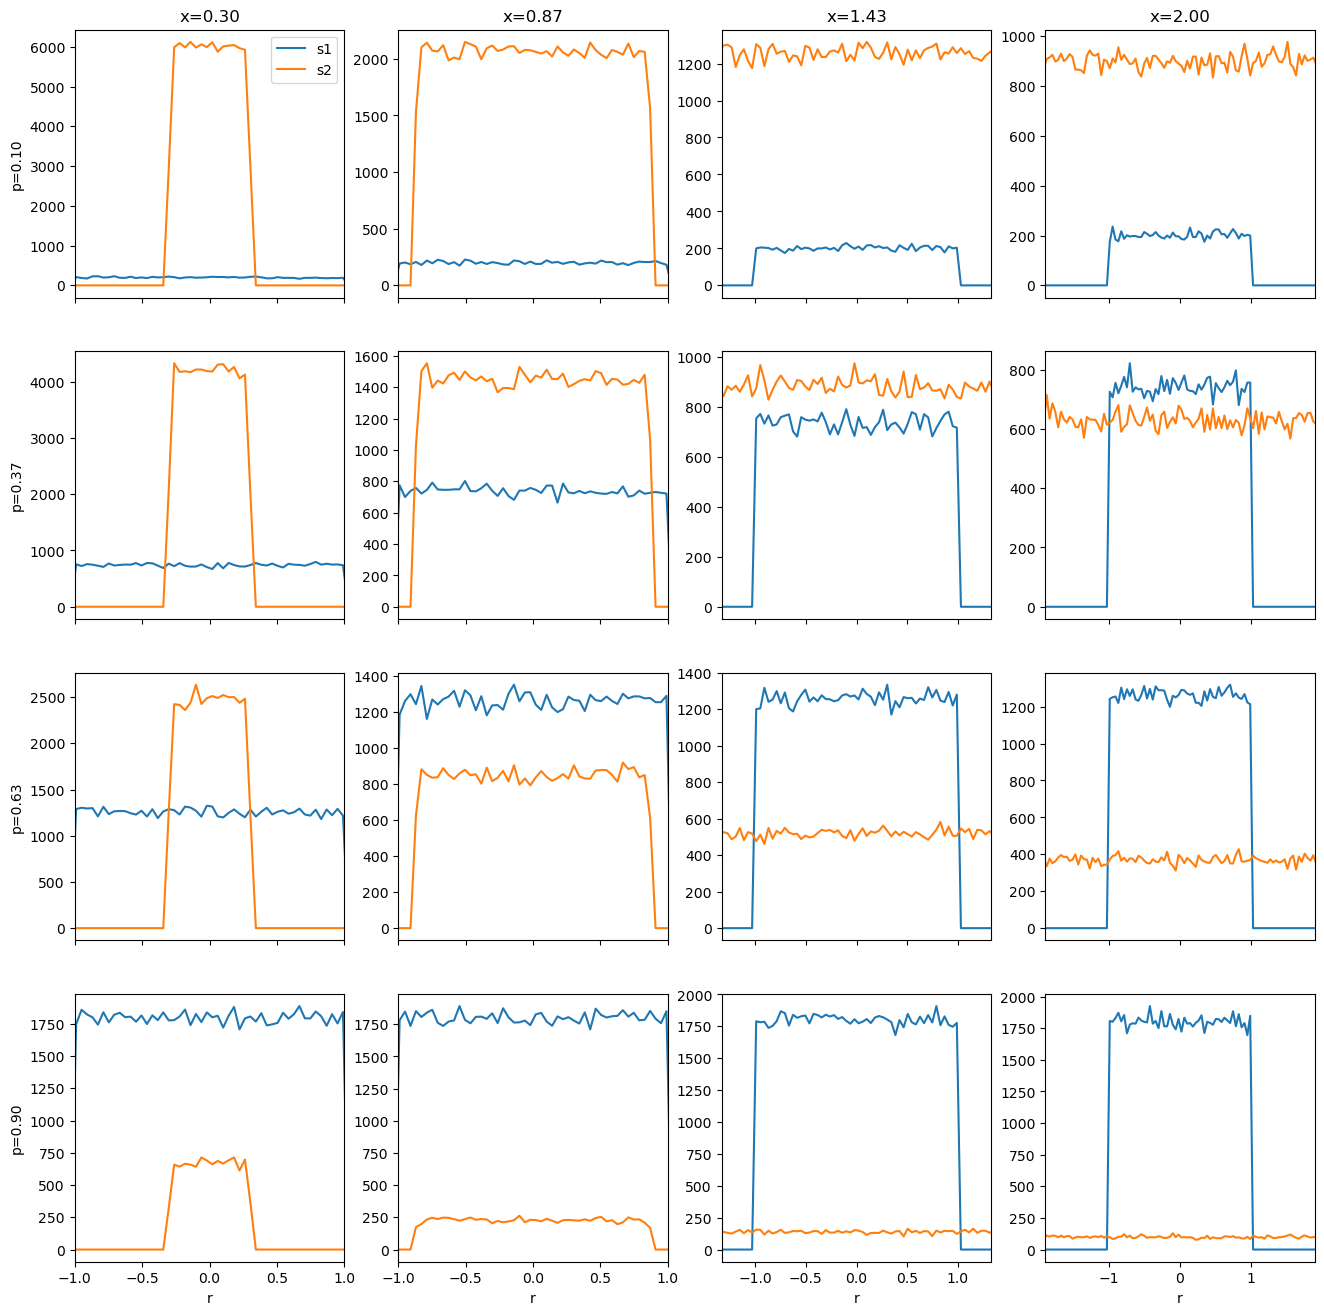

In [148]:
# (c) Answer
p_all = np.array([0.1, 0.37, 0.63, 0.9])
x_all = np.array([0.3, 0.87, 1.43, 2])
s1 = 1.0
s2 = 2.0

def generate_stimuli(p, n_samples):
    stimuli = np.zeros(n_samples)
    for i in range(n_samples):
        rand_val = np.random.rand()
        stimuli[i] = s1 * (rand_val <= p) + s2 * (rand_val > p)
        
    return stimuli

def get_responses(stimuli, x):
    responses = np.zeros(n_samples)
    for i, stimulus in enumerate(stimuli):
        if stimulus == s1:
            responses[i] = np.random.uniform(-1,1)
        elif stimulus == s2:
            responses[i] = np.random.uniform(-x,x)
        else:
            raise "wrong stimulus"
            
    return responses

def estimator(responses, p, x):
    estimation = np.zeros(n_samples)
    for i, response in enumerate(responses):
        if p > 1/(1+x):
            if abs(response) < 1:
                estimation[i] = s1
            else:
                estimation[i] = s2
        else:
            if abs(response) < x:
                estimation[i] = s2
            else:
                estimation[i] = s1
        
    return estimation

def get_MDE_simulation(estimation, stimuli):
    assert len(estimation) == len(stimuli)
    MDE = np.array([estimation[i] != stimuli[i] for i in range(len(estimation))])
    MDE = np.sum(MDE) / len(estimation)
    
    return MDE

def get_MDE_analytical(p, x):
    if x > 1:
        if p > 1/(1+x):
            MDE = (1-p)/x
        else:
            MDE = p
    else:
        if p > 1/(1+x):
            MDE = 1-p
        else:
            MDE = p*x
            
    return MDE

n_samples = 100000
weird_estimation = []
weird_stimuli = []
fig, axes = plt.subplots(4,4,figsize=(16,16))
for i,p in enumerate(p_all):
    for j,x in enumerate(x_all):
        stimuli = generate_stimuli(p, n_samples)
        responses = get_responses(stimuli, x)
        estimation = estimator(responses, p, x)
        if i == 0 and j == 2:
            weird_estimation = estimation
            weird_stimuli = stimuli
        MDE_sim = get_MDE_simulation(estimation, stimuli)
        MDE_anal = get_MDE_analytical(p, x)

        r_axis = np.linspace(-2,2,100)
        s1_idx = np.array(stimuli==s1)
        s2_idx = np.array(stimuli==s2)
        response_s1 = responses[s1_idx]
        response_s2 = responses[s2_idx]

        hist_rs1,_ = np.histogram(response_s1, bins=100, range=(-2,2))
        hist_rs2,_ = np.histogram(response_s2, bins=100, range=(-2,2))
        axes[i,j].plot(r_axis,hist_rs1,label="s1")
        axes[i,j].plot(r_axis,hist_rs2,label="s2")
        axes[i,j].set_xlim(-max(1,x-0.1),max(1,x-0.1))
        if i == 0 and j == 0:
            axes[i,j].legend()
        if i == 0:
            axes[i,j].set_title("x={:.2f}".format(x))
        if j == 0:
            axes[i,j].set_ylabel("p={:.2f}".format(p))
        if i == 3:
            axes[i,j].set_xlabel("r")
        else:
            axes[i,j].set_xticklabels([])
            
        print("p={:.2f} x={:.2f} (stim==1)={:.2f} MDE_sim={:.3f} MDE_anal={:.3f}".format(p, x, np.sum(stimuli==s1)/n_samples, MDE_sim, MDE_anal))